# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

## Load the Data

In [12]:
data = pd.read_csv("../data/covid_data.csv", dtype = str)

#Data types
data['date'] = pd.to_datetime(data['date'])
data['lat'] = pd.to_numeric(data['lat'])
data['long_'] = pd.to_numeric(data['long_'])
data['confirmed'] = pd.to_numeric(data['confirmed'])
data['deaths'] = pd.to_numeric(data['deaths'])

In [16]:
data.head()

,uid,iso2,iso3,code3,fips,admin2,province_state,country_region,lat,long_,combined_key,confirmed,deaths,date
0,16,AS,ASM,16,60,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,2020-01-22
1,316,GU,GUM,316,66,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,2020-01-22
2,580,MP,MNP,580,69,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,2020-01-22
3,630,PR,PRI,630,72,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,2020-01-22
4,850,VI,VIR,850,78,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,2020-01-22


In [ ]:
data.loc['province_state' ==]

## Time Trends

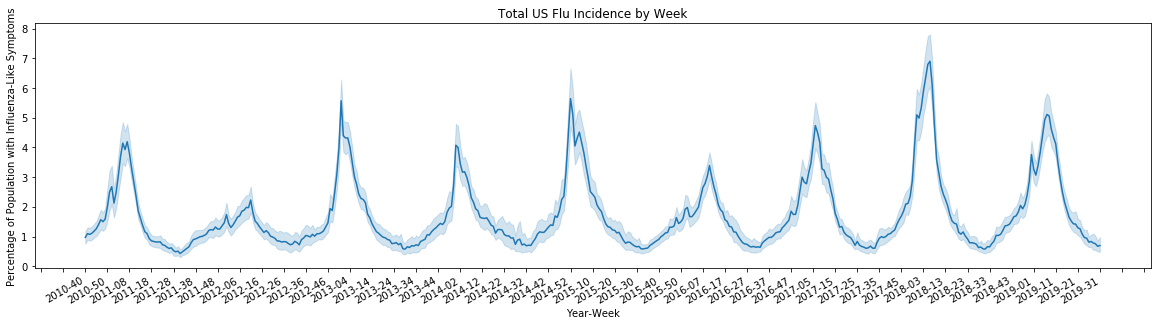

In [4]:
fig, ax = plt.subplots(figsize = (20,5))
sns.lineplot(x = data.time, y = data.wili, estimator = 'mean')
#Labels
plt.title("Total US Flu Incidence by Week")
plt.xlabel("Year-Week")
plt.ylabel("Percentage of Population with Influenza-Like Symptoms")
#Format x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
fig.autofmt_xdate()
plt.show();

When looking at the trends by week, we can see the expected spikes every year during flu season (winter and spring) and the dips that are related to the summer and fall. We can see that there is a much smaller flu season in 2012, and relatively more prevalence in 2013, 2015, and 2018. 

## State Trends

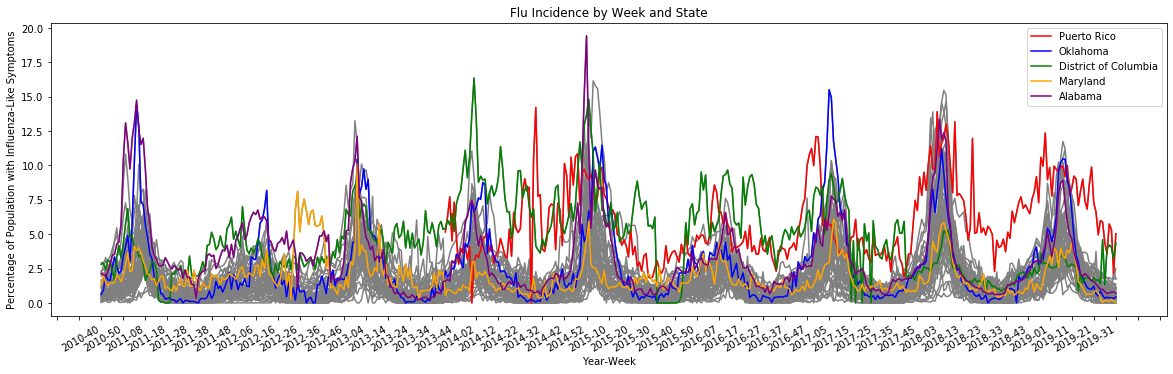

In [5]:

fig, ax = plt.subplots(figsize = (20,6))
#All states
for st in np.unique(data.state):
    sns.lineplot(x = data[data.state == st].time, y = data[data.state == st].wili, estimator = 'mean', color = "gray")
#Outlier states
for st, c in zip(["Puerto Rico","Oklahoma","District of Columbia","Maryland", "Alabama"], \
                 ["red", "blue", "green", "orange", "purple"]):
    sns.lineplot(x = data[data.state == st].time, y = data[data.state == st].wili, \
                 label = st, estimator = 'sum', color = c)
#Labels
plt.title("Flu Incidence by Week and State")
plt.xlabel("Year-Week")
plt.ylabel("Percentage of Population with Influenza-Like Symptoms")
#Format x-axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
fig.autofmt_xdate()


plt.show();


When looking at the time series trends by state, a few states are obvious outliers. Those states are called out in colored lines above.

I think it's interesting that PR and DC are consistently above the average with their flu incidence, even during the summer/off-months; although DC drops back down to the norm in 2018. Maryland saw an interesting spike in the summer of 2012. Oklahoma and Alabama see spikes of flu incidence in the winter/spring seasons that are consistently higher than the other states.